In [46]:
#PER IL DOCENTE: SCARICARE IL FILE owid--covid-data-old.csv SEPARATAMENTE DALLA MIA REPOSITORY

#Importo csv, ispeziono colonne e datatypes
import pandas as pd
df = pd.read_csv("owid-covid-data-old.csv")
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262423 entries, 0 to 262422
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    262423 non-null  object 
 1   continent                                   247696 non-null  object 
 2   location                                    262423 non-null  object 
 3   date                                        262423 non-null  object 
 4   total_cases                                 247875 non-null  float64
 5   new_cases                                   247524 non-null  float64
 6   new_cases_smoothed                          246320 non-null  float64
 7   total_deaths                                228138 non-null  float64
 8   new_deaths                                  228025 non-null  float64
 9   new_deaths_smoothed                         226839 non-null  float64
 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [47]:
#Voglio lavorare solo con Paesi e continenti, quindi escludo gli aggregati
df_pulito = df[df['continent'].notna()]   #Escludo righe dove continent è nan (ovvero gli aggregati)
print(df_pulito)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
262418      ZWE    Africa     Zimbabwe  2023-03-03     264127.0        NaN   
262419      ZWE    Africa     Zimbabwe  2023-03-04     264127.0        NaN   
262420      ZWE    Africa     Zimbabwe  2023-03-05     264127.0        NaN   
262421      ZWE    Africa     Zimbabwe  2023-03-06     264127.0        NaN   
262422      ZWE    Africa     Zimbabwe  2023-03-07     264127.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [28]:
#Devo calcolare i total_cases mondiali ad oggi (2023-03-07); essendo dati cumulativi, prendo solo l'ultima data per ogni Paese
df_sorted = df_pulito.sort_values(by=['location', 'date'], ascending=[True, False])   #Ordino per location e data descrescente, così la prima data risulta essere la più recente
df_latest = df_sorted.drop_duplicates(subset='location', keep='first')   #Eimino duplicati di df.sorted in base alla colonna location. Con keep='First' tengo solo la prima riga, ovvero la data più recente
print(df_latest)

       iso_code continent           location        date  total_cases  \
1107        AFG      Asia        Afghanistan  2023-03-07     209436.0   
3333        ALB    Europe            Albania  2023-03-07     334427.0   
4440        DZA    Africa            Algeria  2023-03-07     271490.0   
5541        AND    Europe            Andorra  2023-03-07      47875.0   
6624        AGO    Africa             Angola  2023-03-07     105277.0   
...         ...       ...                ...         ...          ...   
258050      WLF   Oceania  Wallis and Futuna  2023-03-07       3427.0   
258051      ESH    Africa     Western Sahara  2022-04-20          NaN   
260254      YEM      Asia              Yemen  2023-03-07      11945.0   
261339      ZMB    Africa             Zambia  2023-03-07     343135.0   
262422      ZWE    Africa           Zimbabwe  2023-03-07     264127.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
1107         30.0              16.286        7896.0     

In [26]:
#Cerco i total_cases per continente
casi_per_continente = df_latest.groupby('continent')['total_cases'].sum()   # Raggruppo per continente e sommo i total_cases
print(casi_per_continente)

continent
Africa            12522542.0
Asia             210708488.0
Europe           248311550.0
North America    122575030.0
Oceania           14027367.0
South America     67954281.0
Name: total_cases, dtype: float64


In [29]:
#Calcolo i total_cases mondiali
totale_mondiale = casi_per_continente.sum()   #Sommo i casi per continente
print(totale_mondiale)

676099258.0


In [30]:
#Calcolo la percentuale di casi per continente rispetto al totale mondiale
percentuale_continente = (casi_per_continente / totale_mondiale) * 100
print(percentuale_continente)

continent
Africa            1.852175
Asia             31.165319
Europe           36.727085
North America    18.129739
Oceania           2.074750
South America    10.050933
Name: total_cases, dtype: float64


In [34]:
#Analizzo dati relativi ai casi in Italia nel 2022
italia = df[(df['location'] == 'Italy')]   #Prendo l'Italia
italia['date'] = pd.to_datetime(italia['date'])   #Converto la colonna data in datetime per sicurezza
italia_2022 = italia[(italia['date'].dt.year == 2022)]   #Prendo solo il 2022
italia_2022_pulito = italia_2022[italia_2022['new_cases'].notna()]   #Rimuovo i nan perché sono i giorni senza misurazioni
print(italia_2022_pulito)

       iso_code continent location       date  total_cases  new_cases  \
116313      ITA    Europe    Italy 2022-01-01    6266939.0   141256.0   
116314      ITA    Europe    Italy 2022-01-02    6328076.0    61137.0   
116315      ITA    Europe    Italy 2022-01-03    6396110.0    68034.0   
116316      ITA    Europe    Italy 2022-01-04    6566947.0   170837.0   
116317      ITA    Europe    Italy 2022-01-05    6756035.0   189088.0   
...         ...       ...      ...        ...          ...        ...   
116673      ITA    Europe    Italy 2022-12-27   25021606.0        0.0   
116674      ITA    Europe    Italy 2022-12-28   25021606.0        0.0   
116675      ITA    Europe    Italy 2022-12-29   25021606.0        0.0   
116676      ITA    Europe    Italy 2022-12-30   25143705.0   122099.0   
116677      ITA    Europe    Italy 2022-12-31   25143705.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
116313           92072.571      137513.0      

C:\Users\alice\AppData\Local\Temp\ipykernel_3724\493549439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italia['date'] = pd.to_datetime(italia['date'])   #Converto la colonna data in datetime per sicurezza


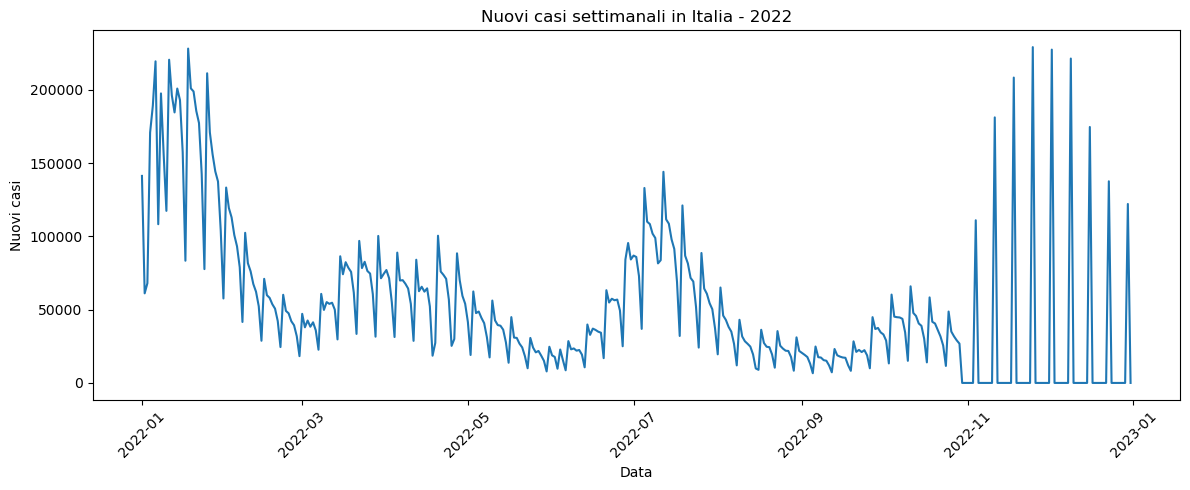

In [36]:
#Creo un grafico che mostra la situazione dell'Italia nel 2022
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.lineplot(data=italia_2022_pulito, x='date', y='new_cases')
plt.title('Nuovi casi settimanali in Italia - 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\alice\AppData\Local\Temp\ipykernel_3724\381927823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_icu['date'] = pd.to_datetime(df_icu['date'])   #Converto la data in datetime per sicurezza


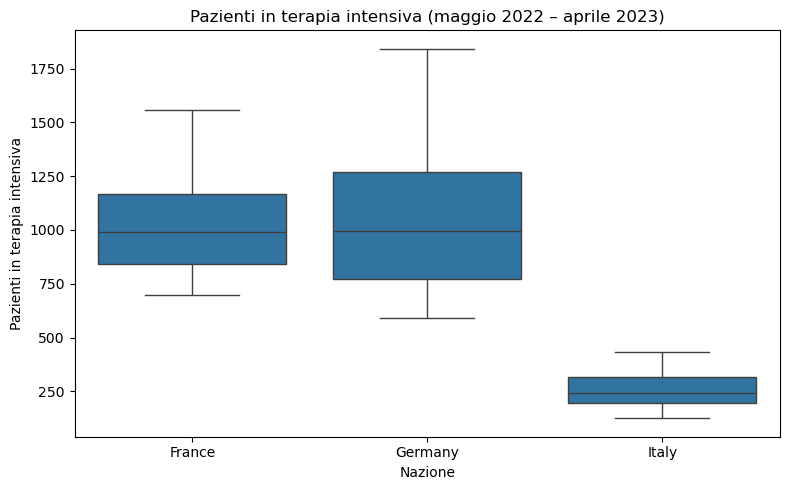

In [39]:
#Cerco la differenza nei pazienti in terapia intensiva tra ITA, FRA e GER nel periodo maggio '22 ad aprile '23
nazioni = ['Italy', 'Germany', 'France']   #Prendo i Paesi interessati
df_icu = df[df['location'].isin(nazioni)]   #Cerco i pazienti in terapia intensiva in questi Paesi
df_icu['date'] = pd.to_datetime(df_icu['date'])   #Converto la data in datetime per sicurezza
df_icu = df_icu[(df_icu['date'] >= '2022-05-01') & (df_icu['date'] <= '2023-04-30')]   #Filtro date: da maggio 2022 ad aprile 2023
df_icu = df_icu[df_icu['icu_patients'].notna()]   #Tolgo i valori nulli

#Mostro un boxplot con questi dati
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_icu, x='location', y='icu_patients')
plt.title('Pazienti in terapia intensiva (maggio 2022 – aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva')
plt.tight_layout()
plt.show()


In [ ]:
#Si osserva che la Germania ha avuto una media più alta di pazienti in terapia intensiva rispetto a Italia e Francia.

C:\Users\alice\AppData\Local\Temp\ipykernel_3724\2965376913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp['date'] = pd.to_datetime(df_hosp['date'])   #Converto la colonna date in datetime per sicurezza


Somma pazienti ospedalizzati nel 2021:
 location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


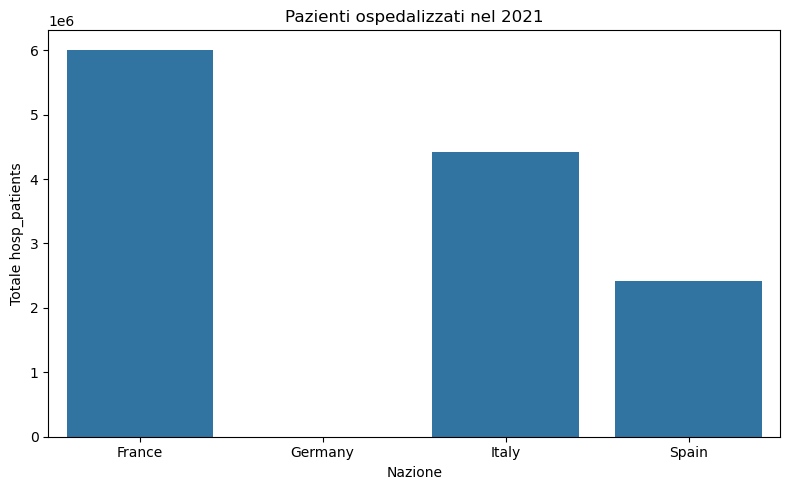

In [42]:
#Cerco la somma dei pazienti ospedalizzati ('hosp_patients') in ITA, GER, FRA, SPA nel 2021
nazioni = ['Italy', 'Germany', 'France', 'Spain']   #Prendo i Paesi interessati
df_hosp = df[df['location'].isin(nazioni)]   #Cerco gli ospedalizzati per ogni Paese interessato
df_hosp['date'] = pd.to_datetime(df_hosp['date'])   #Converto la colonna date in datetime per sicurezza
df_hosp_2021 = df_hosp[df_hosp['date'].dt.year == 2021]   # Filtro solo il 2021
somma_hosp = df_hosp_2021.groupby('location')['hosp_patients'].sum()   # Sommo gli ospedalizzati di ogni Paese interessato
print("Somma pazienti ospedalizzati nel 2021:\n", somma_hosp)

#Mostro un grafico
plt.figure(figsize=(8, 5))
sns.barplot(x=somma_hosp.index, y=somma_hosp.values)
plt.title('Pazienti ospedalizzati nel 2021')
plt.ylabel('Totale hosp_patients')
plt.xlabel('Nazione')
plt.tight_layout()
plt.show()


In [43]:
#Mi accorgo che la Germania non ha avuto ospedalizzati nel 2021, quindi mi insospettisco e controllo la sua colonna 'hosp_patients'
df_hosp_2021[df_hosp_2021['location'] == 'Germany'][['date', 'hosp_patients']].head(10)


,date,hosp_patients
87918,2021-01-01,NaN
87919,2021-01-02,NaN
87920,2021-01-03,NaN
87921,2021-01-04,NaN
87922,2021-01-05,NaN
87923,2021-01-06,NaN
87924,2021-01-07,NaN
87925,2021-01-08,NaN
87926,2021-01-09,NaN
87927,2021-01-10,NaN


In [44]:
#Noto che le prime righe hanno solo valori nulli. Voglio vedere quanti ce ne sono in tutta la colonna 'hosp_patients'
df_hosp_2021[df_hosp_2021['location'] == 'Germany']['hosp_patients'].isna().sum()


365

In [45]:
#Noto che in 'hosp_patients' ci sono 365 valori nulli, ovvero i giorni di un anno, quindi controllo i nan del 2021
df_hosp_2021[df_hosp_2021['location'] == 'Germany'].shape[0]


365

In [ ]:
#Noto che nel 2021 ci sono 365 nan per la colonna 'hosp_patients'. Deduco che la Germania non ha fornito
#dati sugli ospedalizzati per quell'anno. 
#Non sarebbe corretto sostituire questi dati nulli in quanto non dispongo di altre fonti di dati ufficiali.
#Ritengo che la Germania vada esclusa da questa specifica analisi tra i 4 Paesi.